假设一个在线商店想要了解其销售额的变化。销售额（总收入）是由两个关键因子决定的：访问人数（流量）和转化率（每个访问者平均购买金额）。

设定以下数据：

    本期访问人数为5000人，基期访问人数为4500人。
    本期转化率为0.1，即平均每个访问者购买10元商品，基期转化率为0.09。

我们可以计算本期和基期的销售额，然后进一步分解这两个关键因子的贡献。

首先，我们计算总销售额的变化，然后再分解访问人数和转化率的贡献。

## 1. 乘法分解

In [10]:
visitors_current = 5000
visitors_base = 4500
conversion_rate_current = 0.1
conversion_rate_base = 0.08

# 计算基期销售额和当期销售额
sales_current = visitors_current * conversion_rate_current * 10  # 10 is the average purchase amount
sales_base = visitors_base * conversion_rate_base * 10

# 计算每个子因子的log偏差
visitor_log_offset = np.log(visitors_current) - np.log(visitors_base) # 访问人数
conversion_rate_log_offset = np.log(conversion_rate_current) - np.log(conversion_rate_base) # 转化率

# 计算sales的总偏差
sales_log_offset = np.log(sales_current) - np.log(sales_base)

# 计算子因子的贡献
visitor_contribution = visitor_log_offset / sales_log_offset
conversion_rate_contribution = conversion_rate_log_offset / sales_log_offset

visitor_contribution, conversion_rate_contribution


(0.3207281925882372, 0.6792718074117614)

    访问人数（流量）对销售额变化的贡献为32%
    转化率对销售额变化的贡献为68%

这意味着在本例中，转化率对销售额的增长有着更大的的影响。这种贡献表明，为了进一步提高销售额，在线商店应该关注优化转化率。

## 2.再次分解
- 子因子的符号（正或负）可以通过它们的偏移量（本期值与基期值之间的差异）来确定。如果偏移量为正，表示该子因子有正向贡献；如果为负，表示有负向贡献。
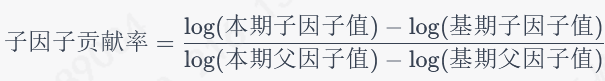
- 假设"访问人数"这个因子可以进一步被分解为以下两个子因子：  新访、   回访客数

我们设定以下数据：

    本期新访客数为3200人，基期新访客数为3000人。
    本期回访客数为1800人，基期回访客数为1500人。

我们将使用上述乘法-log转化方法来计算这两个子因子的贡献率。

In [17]:
# Given sub-factor values for 访问人数
new_visitors_current = 3200
new_visitors_base = 3000
returning_visitors_current = 1800
returning_visitors_base = 1500

# Calculate the log offset for each sub-factor
new_visitors_log_offset = np.log(new_visitors_current) - np.log(new_visitors_base)
returning_visitors_log_offset = np.log(returning_visitors_current) - np.log(returning_visitors_base)

# Calculate the total log offset for 访问人数 (previously calculated)
total_log_offset = new_visitors_log_offset + returning_visitors_log_offset

# Calculate the contribution of each sub-factor based on the total log offset
new_visitor_contribution = new_visitors_log_offset / total_log_offset * 0.32  # Multiplying by 50% as 访问人数's contribution is 50%
returning_visitor_contribution = returning_visitors_log_offset / total_log_offset * 0.32

new_visitor_contribution, returning_visitor_contribution


(0.08366005122039905, 0.23633994877960096)

- 我们可以得到：

    - 新访客数的实际贡献率为8.37%
    - 回访客数的实际贡献率为23.63%

## 3. 销售额=成交客数*客单价

In [58]:
df = pd.read_excel(r"C:\Users\hp\Desktop\归因分析1.xlsx",header=[0,1])
df.head()

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


销售额                           成交客数                     客单价             
     战区     实绩     同期     同比        实绩        同期     同比     实绩    同期     同比
0  自营直营  87006  85305  0.020  10079130  10246315 -0.016   86.3  83.3  0.037
1  江阴战区   1287   1212  0.061    130815    141554 -0.076   98.4  85.6  0.149
2  陕西战区   6307   5089  0.239    622261    513015  0.213  101.4  99.2  0.022
3  通辽战区   3656   3282  0.114    446118    440215  0.013   82.0  74.6  0.099
4  苏南战区   5470   5391  0.015    617731    658085 -0.061   88.5  81.9  0.081

### 3.1 Log 乘法

In [59]:
# Sum up the values for each column to get the overall values
overall_values = df.sum(numeric_only=True)

# Extract values for the main factor and sub-factors
gross_margin_current = overall_values[('销售额', '实绩')] * 10000
gross_margin_base = overall_values[('销售额', '同期')] * 10000

# Correcting the column names for '成交客数' and extracting values again
transaction_count_current = overall_values[(' 成交客数', '实绩')]
transaction_count_base = overall_values[(' 成交客数', '同期')]

transaction_price_current = overall_values[('客单价', '实绩')]
transaction_price_base = overall_values[('客单价', '同期')]

# Calculate the log offsets for the main factor and sub-factors
gross_margin_log_offset = np.log(gross_margin_current) - np.log(gross_margin_base)
transaction_count_log_offset = np.log(transaction_count_current) - np.log(transaction_count_base)
transaction_price_log_offset = np.log(transaction_price_current) - np.log(transaction_price_base)

# Calculate the contribution of each sub-factor based on the main factor's log offset
transaction_count_contribution = transaction_count_log_offset / gross_margin_log_offset
transaction_price_contribution = transaction_price_log_offset / gross_margin_log_offset

transaction_count_contribution, transaction_price_contribution

(-0.832981267653557, 1.1073587791730666)

- "成交客数" 的贡献率为 −83.30%：这意味着成交客数相对于基期减少了，这导致销售额减少了 83.30%
- "客单价" 的贡献率为 110.74%：这意味着客单价相对于基期上升了，这导致销售额增加了110.74%

### 3.2 连环替代法

In [60]:
sales_base = df[('销售额', '同期')].values[0] * 10000
sales_current = df[('销售额', '实绩')].values[0] * 10000

transaction_count_base = df[(' 成交客数', '同期')].values[0]
transaction_count_current = df[(' 成交客数', '实绩')].values[0]

transaction_price_base = df[('客单价', '同期')].values[0]
transaction_price_current = df[('客单价', '实绩')].values[0]

# 定义销售额的变化值
sales_change = sales_current - sales_base

# 首先替换 'a' (成交客数)
Ma = transaction_count_current * transaction_price_base

# 计算 'a' 的贡献
Ha = Ma - sales_base

# 然后替换 'b' (客单价)
Mb = transaction_count_current * transaction_price_current

# 计算 'b' 的贡献
Hb = Mb - Ma

# 计算每个子因子的贡献度百分比
Ha_percentage = Ha / sales_change
Hb_percentage = Hb / sales_change
Ha_percentage, Hb_percentage

(-0.7912093474426808, 1.7776243386243387)

### 3.3 控制替代法

In [61]:
# 使用控制替代法计算贡献度
# 首先替换 'a' (成交客数) 并控制其他指标不变
Ma_control = transaction_count_current * transaction_price_base
Ha_control = Ma_control - sales_base
# 然后替换 'b' (客单价) 并控制其他指标不变
Mb_control = transaction_count_base * transaction_price_current
Hb_control = Mb_control - sales_base
# 由于我们只有两个子因子，没有 'c' 因子，所以不进行c的替换计算
# 计算每个子因子的贡献度
Contri_a = Ha_control / (abs(Ha_control) + abs(Hb_control))
Contri_b = Hb_control / (abs(Ha_control) + abs(Hb_control))
Contri_a, Contri_b

(-0.3013172226576756, 0.6986827773423244)

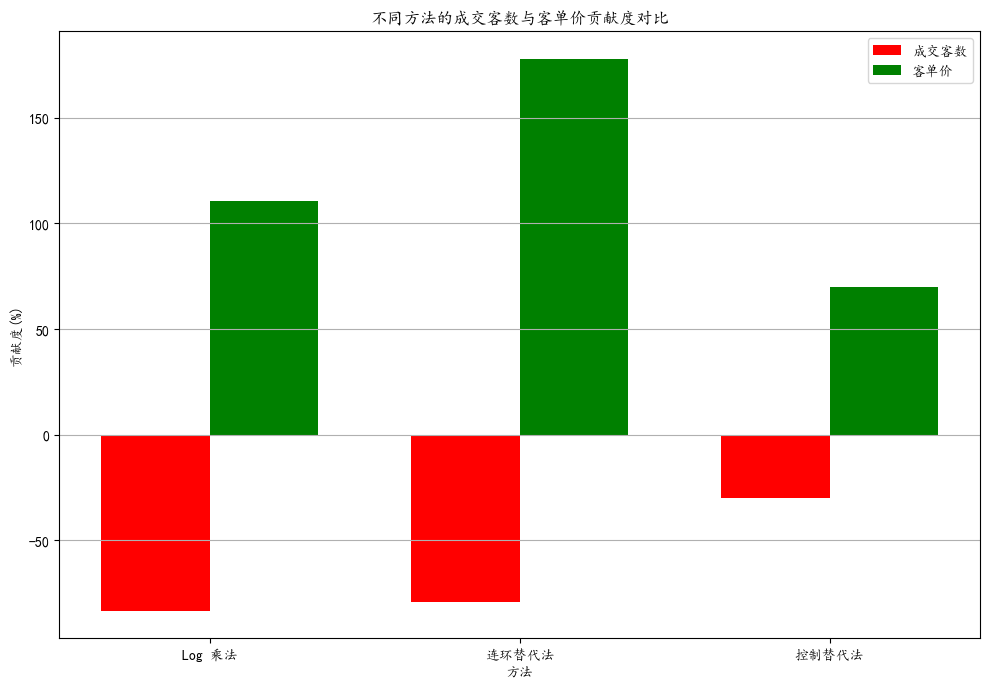

In [72]:
# 提供的数据
methods = ["Log 乘法", "连环替代法", "控制替代法"]
contributions_transaction_count = [-83.30, -79.1, -30.1]
contributions_transaction_price = [110.7, 177.8, 69.9]

# 绘制柱状图
bar_width = 0.35
index = np.arange(len(methods))

plt.figure(figsize=(10, 7))
bar1 = plt.bar(index, contributions_transaction_count, bar_width, color='r', label='成交客数')
bar2 = plt.bar(index + bar_width, contributions_transaction_price, bar_width, color='g', label='客单价')

# 设置标题和标签
plt.xlabel('方法')
plt.ylabel('贡献度(%)')
plt.title('不同方法的成交客数与客单价贡献度对比')
plt.xticks(index + bar_width / 2, methods)  # Positioning the x-labels in the center of the group of bars
plt.legend()
plt.tight_layout()
plt.grid(axis='y')

plt.show()


### 4. 各战区对毛利额贡献度

In [38]:
zones_data = {
    "战区": ["自营直营", "江阴战区", "陕西战区", "通辽战区", "苏南战区", "赤峰战区", "新东战区", "广西战区", 
            "天津战区", "甘宁战区", "湖南战区", "新中战区", "临沂战区", "南通战区", "安徽战区", "扬州战区", "运城战区"],
    "实绩": [26588, 433, 1883, 1173, 1901, 951, 1500, 1740, 931, 2318, 7329, 1698, 500, 757, 1994, 867, 613],
    "同期": [26156, 430, 1490, 1134, 1817, 926, 1402, 1792, 921, 2388, 6914, 1787, 530, 915, 2115, 960, 635]
}

zones_df = pd.DataFrame(zones_data)
zones_df.head()

,战区,实绩,同期
0,自营直营,26588,26156
1,江阴战区,433,430
2,陕西战区,1883,1490
3,通辽战区,1173,1134
4,苏南战区,1901,1817


#### 4.1 超均贡献计算度

In [39]:
# Calculate the fluctuation rate for the overall indicator
overall_fluctuation_rate = (overall_current - overall_base) / overall_base
# Calculate the fluctuation rate for each zone
zones_df["fluctuation_rate"] = (zones_df["实绩"] - zones_df["同期"]) / zones_df["同期"]
# Calculate the ultra-average contribution value
zones_df["ultra_avg_contribution_value"] = (zones_df["fluctuation_rate"] - overall_fluctuation_rate) * zones_df["实绩"]
# Calculate the contribution rate
total_contribution_value_sum = zones_df["ultra_avg_contribution_value"].abs().sum()
zones_df["contribution_rate"] = zones_df["ultra_avg_contribution_value"] / total_contribution_value_sum
ultra_avg_contributions = zones_df[["战区", "contribution_rate"]]
ultra_avg_contributions

,战区,contribution_rate
0,自营直营,0.000000
1,江阴战区,-0.002407
2,陕西战区,0.271327
3,通辽战区,0.012220
4,苏南战区,0.032920
5,赤峰战区,0.005809
6,新东战区,0.046668
7,广西战区,-0.046175
8,天津战区,-0.003070
9,甘宁战区,-0.061913


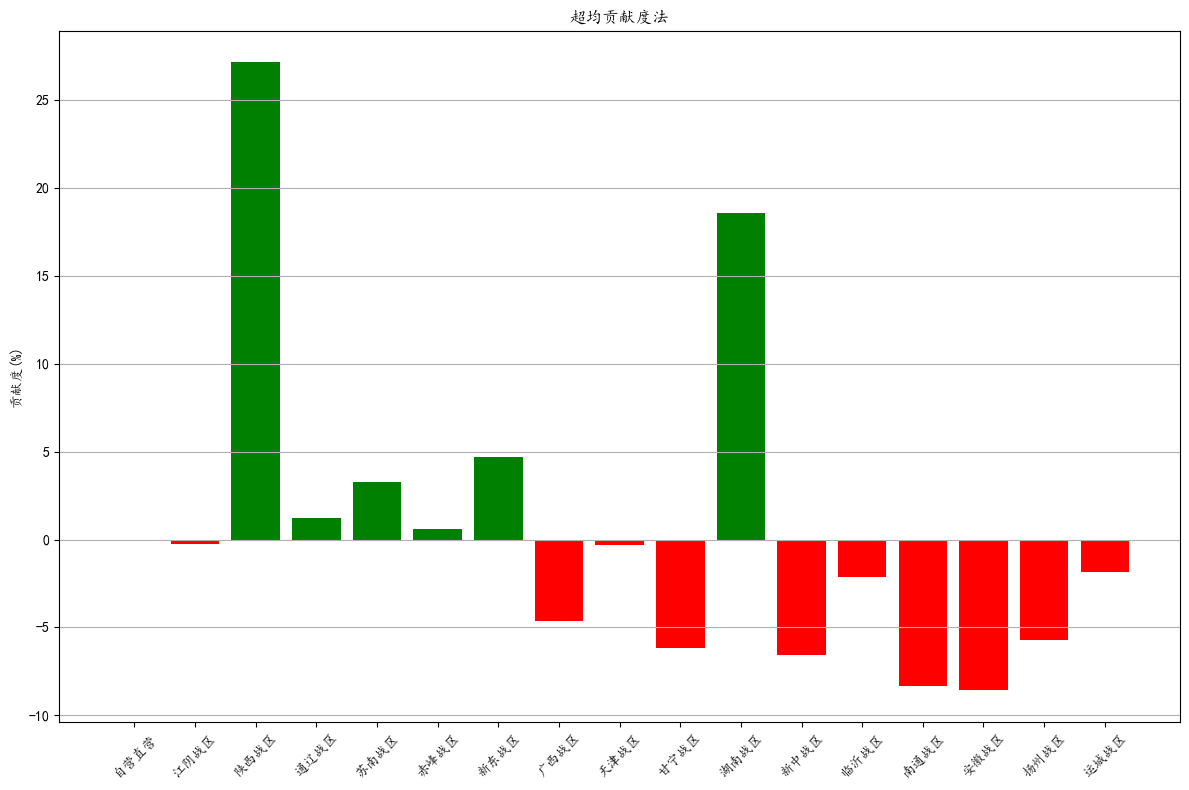

In [69]:
# 设置字体和忽略警告
import matplotlib.pyplot as plt
import warnings
plt.rcParams['font.sans-serif'] = ['KaiTi']
warnings.filterwarnings("ignore")
plt.rcParams['axes.unicode_minus'] = False

# 提供的新数据
contributions_updated = [0.00, -0.24, 27.13, 1.22, 3.29, 0.58, 4.67, -4.62, -0.31, 
                         -6.19, 18.58, -6.56, -2.13, -8.35, -8.57, -5.73, -1.83]

# 绘制柱状图
plt.figure(figsize=(12, 8))
plt.bar(factors_names, contributions_updated, color=['red' if val < 0 else 'green' for val in contributions_updated])
plt.ylabel('贡献度(%)')
plt.title('超均贡献度法')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



#### 4.2 加法拆分

In [35]:
# Calculate the absolute change for the overall and for each zone
overall_absolute_change = overall_current - overall_base
zones_df["absolute_change"] = zones_df["实绩"] - zones_df["同期"]

# Calculate the contribution of each zone based on the overall absolute change
zones_df["additive_contribution"] = zones_df["absolute_change"] / overall_absolute_change

additive_contributions = zones_df[["战区", "additive_contribution"]]

,战区,additive_contribution
0,自营直营,0.500000
1,江阴战区,0.003472
2,陕西战区,0.454861
3,通辽战区,0.045139
4,苏南战区,0.097222
5,赤峰战区,0.028935
6,新东战区,0.113426
7,广西战区,-0.060185
8,天津战区,0.011574
9,甘宁战区,-0.081019


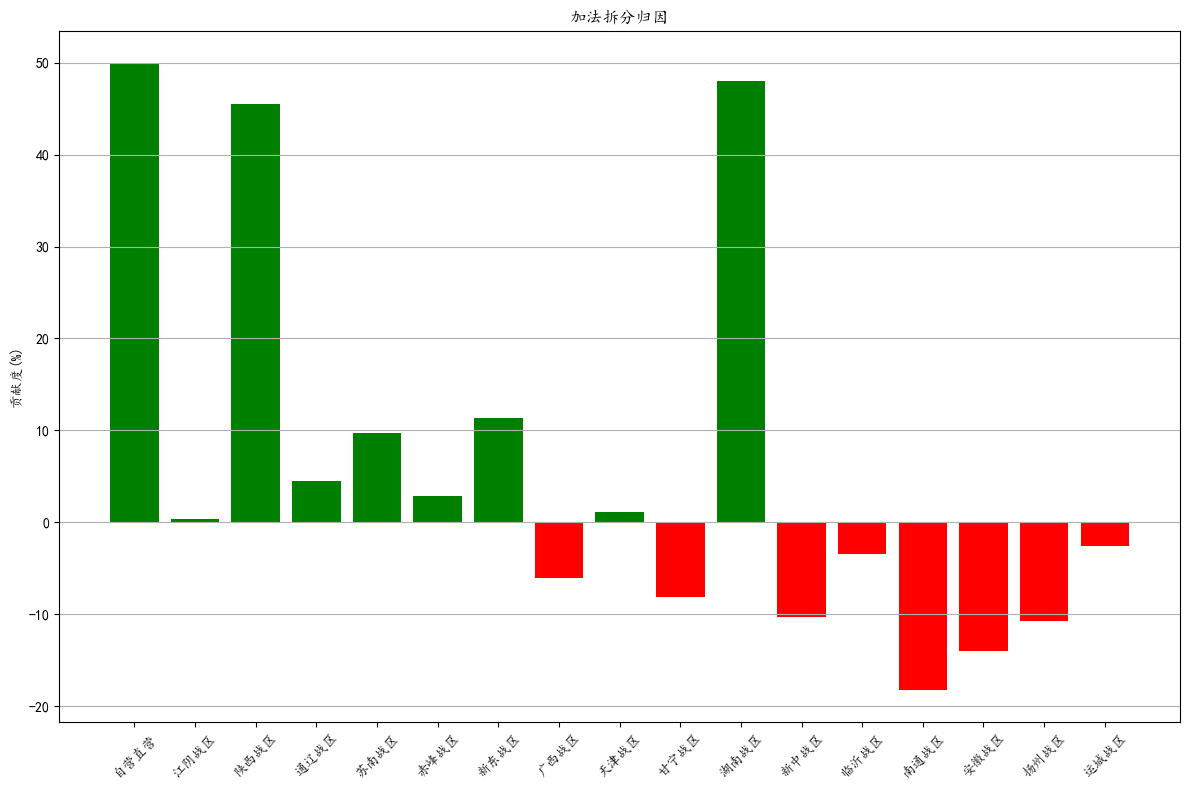

In [70]:
# 设置字体和忽略警告
import matplotlib.pyplot as plt
import warnings
plt.rcParams['font.sans-serif'] = ['KaiTi']
warnings.filterwarnings("ignore")
plt.rcParams['axes.unicode_minus'] = False

# 提供的数据
factors_names = ["自营直营", "江阴战区", "陕西战区", "通辽战区", "苏南战区", "赤峰战区", "新东战区", 
                 "广西战区", "天津战区", "甘宁战区", "湖南战区", "新中战区", "临沂战区", "南通战区", 
                 "安徽战区", "扬州战区", "运城战区"]
contributions_new = [50.00, 0.35, 45.49, 4.51, 9.72, 2.89, 11.34, -6.02, 1.16, -8.10, 
                     48.03, -10.30, -3.47, -18.29, -14.00, -10.76, -2.55]

# 绘制柱状图
plt.figure(figsize=(12, 8))
plt.bar(factors_names, contributions_new, color=['red' if val < 0 else 'green' for val in contributions_new])
plt.ylabel('贡献度(%)')
plt.title('加法拆分归因')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
